Name: Write Your Name Here

In [41]:
#Name: Kathleen Melonashi

Submission:

1- Run all cells (this is important, the results will remain there for us to look)

2- Download .ipynb

3- Submit your .ipynb on Gradescope

4- Double check your submitted file to make sure the submission is correct and it shows all the cell outputs


In [42]:
#Mounting Google Drive:
#After running this cell a popup window will appear and requesting to select your  Google account and give the access permission.
#You can either use your personal Google account or your UIC Google account.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
#You need to change this path
path="/content/gdrive/MyDrive/CS412/HW2/"

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import re
import pandas as pd

Numpy is library for scientific computing in Python. It has efficient implementation of n-dimensional array (tensor) manupulations, which is useful for machine learning applications.

In [45]:
import numpy as np

We can convert a list into numpy array (tensor)  

In [46]:
b = [[1, 2, 4], [2, 6, 9]]
a = np.array(b)
a

array([[1, 2, 4],
       [2, 6, 9]])

We can check the dimensions of the array

In [47]:
a.shape

(2, 3)

We can apply simple arithmetic operation on all element of a tensor

In [48]:
a * 3

array([[ 3,  6, 12],
       [ 6, 18, 27]])

You can transpose a tensor
    

In [31]:
print(a.T.shape)
a.T

(3, 2)


array([[1, 2],
       [2, 6],
       [4, 9]])

You can apply aggregate functions on the whole tensor

In [49]:
np.sum(a)

24

or on one dimension of it

In [50]:
np.sum(a, axis=0)

array([ 3,  8, 13])

In [51]:
np.sum(a, axis=1)

array([ 7, 17])

We can do element-wise arithmetic operation on two tensors (of the same size)

In [52]:
c1 = np.array([[1, 2, 4], [2, 6, 9]])
c2 = np.array([[2, 3, 5], [1, 2, 1]])
c1 * c2

array([[ 2,  6, 20],
       [ 2, 12,  9]])

If you want to multiply all columns of a tensor by vector (for example if you want to multiply all data features by their lables) you need a trick. This multiplication shows up in calculating the gradients.

In [53]:
a = np.array([[1, 2, 4], [2, 6, 9]])
b = np.array([1,-1])
print(a)
print(b)


[[1 2 4]
 [2 6 9]]
[ 1 -1]


Here we want to multiply the first row of a by 1 and the second row of a by -1. Simply multiplying a by b does not work because a and b do not have the same dimension

In [54]:
a * b

#a * b[:, np.newaxis] -> Correct result

ValueError: ignored

To do this multiplication we first have to assume b has one column and then repeat the column of b with the number of columns in a. We use tile function to do that

In [55]:
b_repeat = np.tile(b,  (a.shape[1],1)).T
print(b_repeat.shape)
b_repeat

(2, 3)


array([[ 1,  1,  1],
       [-1, -1, -1]])

Now we can multiply each column of a by b:

In [56]:
a * b_repeat

array([[ 1,  2,  4],
       [-2, -6, -9]])

You can create inital random vector using numpy (using N(0,1)):

In [57]:
mu = 0 #mean
sigma = 1 #standard deviation
r = np.random.normal(mu,sigma, 1000) #draws 1000 samples from a normal distribution

We can apply functions on tensors

In [58]:
#implementation of Normal distribution
def normal(x, mu, sigma):
    return np.exp( -0.5 * ((x-mu)/sigma)**2)/np.sqrt(2.0*np.pi*sigma**2)

#probability of samples on the Normal distribution
probabilities = normal(r, mu, sigma)

Numpy has useful APIs for analysis. Here we plot the histogram of samples and also plot the probabilies to see if the samples follow the normal distribution.

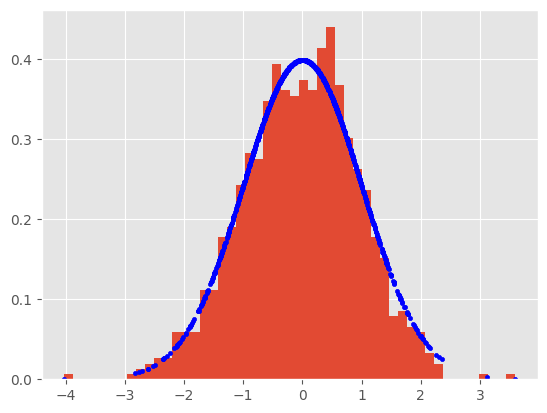

In [59]:
counts, bins = np.histogram(r,50,density=True)
plt.hist(bins[:-1], bins, weights=counts)
plt.scatter(r, probabilities, c='b', marker='.')

In [60]:
def read_data(filename):
    f = open(filename, 'r')
    p = re.compile(',')
    xdata = []
    ydata = []
    header = f.readline().strip()
    varnames = p.split(header)
    namehash = {}
    for l in f:
        li = p.split(l.strip())
        xdata.append([float(x) for x in li[:-1]])
        ydata.append(float(li[-1]))

    return np.array(xdata), np.array(ydata)


Assuming our data is x is available in numpy we use numpy to implement logistic regression


In [61]:
(xtrain_whole, ytrain_whole) = read_data(path + 'spambase-train.csv')
(xtest, ytest) = read_data(path + 'spambase-test.csv')

In [62]:
print("The shape of xtrain:", xtrain_whole.shape)
print("The shape of ytrain:", ytrain_whole.shape)
print("The shape of xtest:", xtest.shape)
print("The shape of ytest:", ytest.shape)

The shape of xtrain: (3601, 54)
The shape of ytrain: (3601,)
The shape of xtest: (1000, 54)
The shape of ytest: (1000,)


before training make we normalize the input data (features)

In [63]:
xmean = np.mean(xtrain_whole, axis=0)
xstd = np.std(xtrain_whole, axis=0)
xtrain_normal_whole = (xtrain_whole-xmean) / xstd
xtest_normal = (xtest-xmean) / xstd


We need to create a validation set. We create an array of indecies and permute it.

In [64]:
premute_indicies = np.random.permutation(np.arange(xtrain_whole.shape[0]))

We keep the first 2600 data points as the training data and rest as the validation data

In [65]:
xtrain_normal = xtrain_normal_whole[premute_indicies[:2600]]
ytrain = ytrain_whole[premute_indicies[:2600]]
xval_normal = xtrain_normal_whole[premute_indicies[2600:]]
yval = ytrain_whole[premute_indicies[2600:]]

Initiallizing the weights and bias with random values from N(0,1)

In [66]:
weights = np.random.normal(0, 1, xtrain_normal.shape[1]);
bias = np.random.normal(0,1,1)

In [67]:
#the sigmoid function
def sigmoid(v):
    #return np.exp(-np.logaddexp(0, -v)) #numerically stable implementation of sigmoid function
    return 1.0 / (1+np.exp(-v))

We can use dot-product from numpy to calculate the margin and pass it to the sigmoid function

In [68]:
#w: weight vector (numpy array of size n)
#b: numpy array of size 1
#returns p(y=1|x, w, b)
def prob(x, w, b):
    return sigmoid(np.dot(x,w) + b);

You can also calculate $l_2$ penalty using linalg library of numpy

In [69]:
np.linalg.norm(weights)

6.0466609204386605

$$\text{Cross Entropy Loss} = -\frac{1}{|D|}[\sum_{(y^i,\mathbf{x}^i)\in\mathcal{D}}
 y^i \log p(y=1|\mathbf{x}^i;\mathbf{w},b)  +  (1-y^i) \log (1 - p(y=1|\mathbf{x}^i;\mathbf{w},b))]+\frac{\lambda}{2} \|\mathbf{w}\|^2 $$

In [70]:
#w: weight vector (numpy array of size n)
#x: training data points (only attributes)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns the cross entropy loss
def loss(w, x, y_prob, y_true, lambda_):
    return ((-1 / len(x)) * np.sum(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))) + (lambda_ / 2) * np.sum(np.square(w))

In [71]:
#x: input variables (data of size m x n with m data point and n features)
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns tuple of gradient w.r.t w and w.r.t to bias

def grad_w_b(x, w, y_prob, y_true, lambda_):
    grad_w = ((1/ x.shape[1]) * np.dot(x.T, y_prob - y_true)) + lambda_ * w
    grad_b = (1 / len(y_true)) * np.sum(y_prob - y_true)
    return (grad_w,grad_b)

In [72]:

#lambda_ is the coeffienct of l2 norm penalty
#learning_rate is learning rate of gradient descent algorithm
#max_iter determines the maximum number of iterations if the gradients descent does not converge.
#continue the training while gradient > 0.1 or the number steps is less max_iter

#returns model as tuple of (weights,bias)

def fit(x, y_true, learning_rate, lambda_, max_iter, verbose=0):
    #initialize weights and bias with random values
    weights = np.random.normal(0, 1, x.shape[1]);
    bias = np.random.normal(0,1,1)

    iter = 0 #iteration counter
    grad_w_norm = 1 #norm of gradients

    #continue until maximum number of iterations is reached or gradient norm is less than 0.1
    while iter < max_iter and grad_w_norm > 0.1:

        y_prob = prob(x, weights, bias)

        #calculate the gradients of the loss function with respect to weights and bias using grad_w_b
        grad_w, grad_b = grad_w_b(x, weights, y_prob, y_true, lambda_)

        #update weights and bias
        weights -= learning_rate * grad_w
        bias -= learning_rate * grad_b

        #calculate L2 norm
        weights_norm = np.linalg.norm(weights)
        grad_w_norm = np.linalg.norm(grad_w)

        if verbose: #verbose is used for debugging purposes
            #calculate loss
            loss_ = loss(weights, x, y_prob, y_true, lambda_)
            #print iteration number, loss, l2 norm of gradients, and l2 norm of weights
            print(f"Iteration Number: {iter}, Loss: {loss_:5f}, l2 norm of gradients: {grad_w_norm:5f}, l2 norm of weights: {weights}")

        iter += 1 #increment iteration counter
    return (weights, bias)

In [73]:
def accuracy(x, y_true, model):
    w, b = model
    return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]

In [74]:
learning_rate = 0.001
lambda_ = 1.0

model = fit(xtrain_normal, ytrain, learning_rate, lambda_, 10000, verbose=1) #keep the verbose on here for your submissions

Streaming output truncated to the last 5000 lines.
 -0.25484985  0.03714831  0.04365453  0.46463625  0.60150868 -0.07051073]
Iteration Number: 2064, Loss: 2.703698, l2 norm of gradients: 0.200700, l2 norm of weights: [ 0.0249642   0.04399569 -0.03691919  0.22677009  0.36116453  0.11333736
  1.01182664  0.20687299  0.23309927  0.09380477  0.08605862 -0.0984724
 -0.13737926  0.12458379  0.47820605  0.58924332  0.26260686  0.02609244
  0.04097166  0.3137529   0.16274674  0.17852847  0.48221513  0.72253637
 -0.59085343 -0.15670474 -0.46104882  0.19144539 -0.00537821  0.00426191
 -0.17124427 -0.01186203 -0.15972013  0.11780297 -0.10520588 -0.01502332
 -0.31937962  0.04519579 -0.04117551  0.17793388 -0.13213853 -0.30578716
  0.03842003 -0.2702888  -0.20784612 -0.41383364 -0.04797523 -0.29249558
 -0.25483572  0.0371467   0.04362272  0.46462735  0.60151652 -0.07051101]
Iteration Number: 2065, Loss: 2.703578, l2 norm of gradients: 0.200375, l2 norm of weights: [ 0.02495124  0.04399125 -0.036921

In [75]:
print("Train accuracy: ", accuracy(xtrain_normal, ytrain, model))

Train accuracy:  0.9142307692307692


<ipython-input-73-c2c25048c40d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]


In [76]:
#grid search for finding the best hyperparams and model

best_model = None
best_val = -1
for lr in [0.01, 0.001, 0.0001, 0.00001]:
    for la in [5, 2, 1, 0.1, 0.01]:
        model = fit(xtrain_normal, ytrain, lr, la, 10000, verbose=0)
        val_acc = accuracy(xval_normal, yval, model)
        print(lr, la, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_model = model


<ipython-input-73-c2c25048c40d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]


0.01 5 0.9270729270729271
0.01 2 0.9300699300699301
0.01 1 0.9020979020979021
0.01 0.1 0.9200799200799201
0.01 0.01 0.932067932067932
0.001 5 0.8761238761238761
0.001 2 0.9170829170829171
0.001 1 0.9280719280719281
0.001 0.1 0.9300699300699301
0.001 0.01 0.9340659340659341
0.0001 5 0.929070929070929
0.0001 2 0.9200799200799201
0.0001 1 0.922077922077922
0.0001 0.1 0.9050949050949051
0.0001 0.01 0.913086913086913
1e-05 5 0.7942057942057942
1e-05 2 0.8021978021978022
1e-05 1 0.7852147852147852
1e-05 0.1 0.6583416583416584
1e-05 0.01 0.7842157842157842


In [77]:
print("Test accuracy: ", accuracy(xtest_normal, ytest, best_model))

Test accuracy:  0.942


<ipython-input-73-c2c25048c40d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]
